# Wine Quality Prediction  

In [1]:
import numpy as np

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('winequalityN.csv')

In [4]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [5]:
df.shape

(6497, 13)

In [6]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [8]:
df['type'].unique()

array(['white', 'red'], dtype=object)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6487.0,7.216579,1.296750,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6489.0,0.339691,0.164649,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6494.0,0.318722,0.145265,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6495.0,5.444326,4.758125,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6495.0,0.056042,0.035036,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6488.0,3.218395,0.160748,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6493.0,0.531215,0.148814,0.22000,0.43000,0.51000,0.60000,2.00000


In [10]:
df.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

Fill the Null values with mean values 

In [12]:
for col in df.columns:
    if df[col].isnull().sum()>0 : 
      df[col]=df[col].fillna(df[col].mean())
        

In [13]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Check the distribution of values for each column

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>],
       [<AxesSubplot:title={'center':'residual sugar'}>,
        <AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>],
       [<AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>,
        <AxesSubplot:title={'center':'pH'}>],
       [<AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>]], dtype=object)

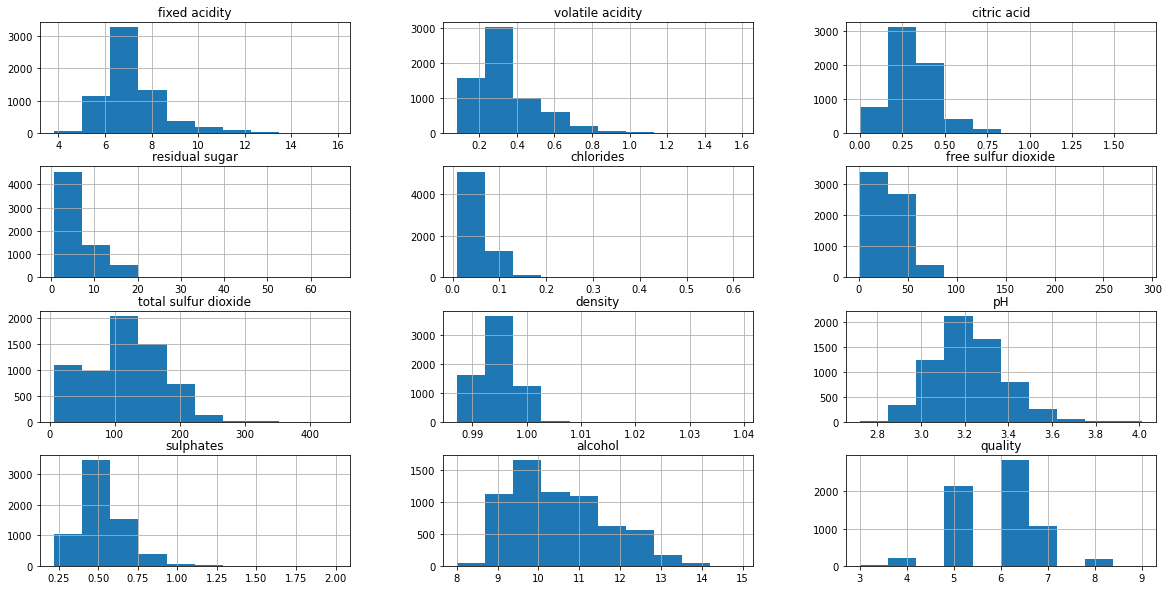

In [24]:
df.hist(figsize =(20,10))

Need to normalise the data 

In [18]:
df['quality'].unique()

array([6, 5, 7, 8, 4, 3, 9])

In [19]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,0.219918,0.323349,-0.112219,0.298282,-0.283237,-0.329409,0.458941,-0.251683,0.300225,-0.095560,-0.076967
volatile acidity,0.219918,1.000000,-0.377759,-0.196578,0.377122,-0.353055,-0.414706,0.271107,0.260283,0.225313,-0.038215,-0.265838
citric acid,0.323349,-0.377759,1.000000,0.142451,0.039310,0.133426,0.195148,0.096307,-0.328354,0.057564,-0.010431,0.085699
residual sugar,-0.112219,-0.196578,0.142451,1.000000,-0.128887,0.403242,0.495704,0.552487,-0.266717,-0.185716,-0.359656,-0.036819
chlorides,0.298282,0.377122,0.039310,-0.128887,1.000000,-0.194978,-0.279547,0.362580,0.044754,0.395073,-0.256844,-0.200818
free sulfur dioxide,-0.283237,-0.353055,0.133426,0.403242,-0.194978,1.000000,0.720934,0.025717,-0.145116,-0.188471,-0.179838,0.055463
total sulfur dioxide,-0.329409,-0.414706,0.195148,0.495704,-0.279547,0.720934,1.000000,0.032395,-0.237523,-0.275291,-0.265740,-0.041385
density,0.458941,0.271107,0.096307,0.552487,0.362580,0.025717,0.032395,1.000000,0.011913,0.259432,-0.686745,-0.305858
pH,-0.251683,0.260283,-0.328354,-0.266717,0.044754,-0.145116,-0.237523,0.011913,1.000000,0.191075,0.120939,0.019356
sulphates,0.300225,0.225313,0.057564,-0.185716,0.395073,-0.188471,-0.275291,0.259432,0.191075,1.000000,-0.003261,0.038713


Planning to reduce the feature list so as to remove redundant parameters

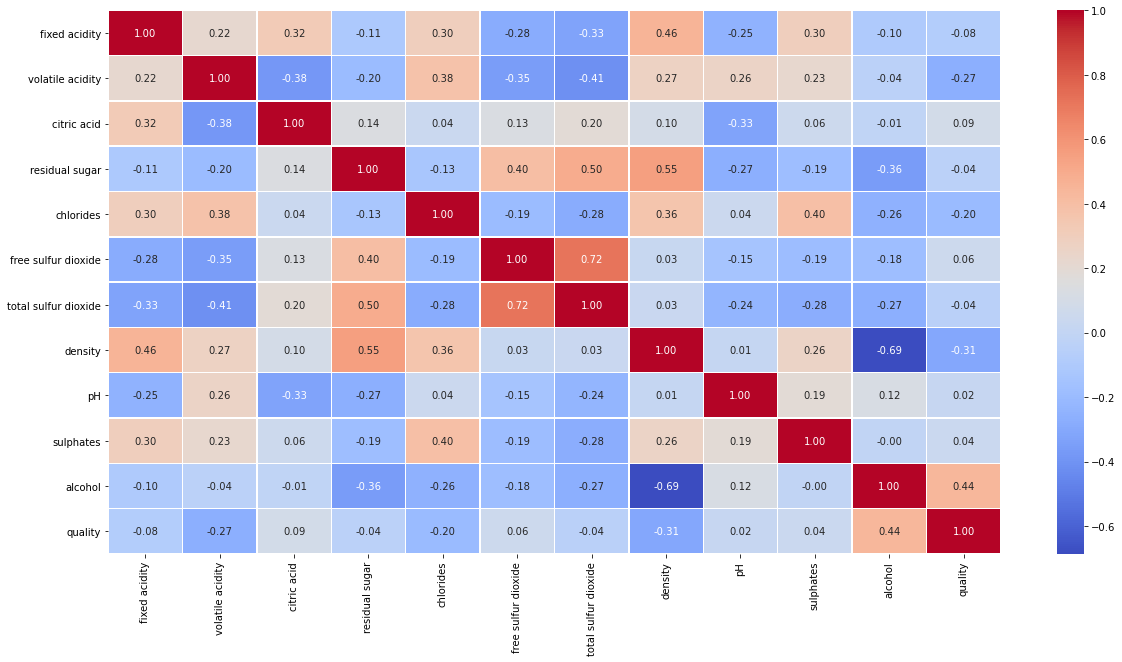

In [26]:

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True, cmap='coolwarm', fmt= "0.2f", linewidths= 0.5)
plt.show()

In [27]:
df['best quality']=[1 if x > 5 else 0 for x in df['quality']]

In [28]:
df= df.drop(columns = ['quality'])

In [29]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,best quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


# For categorical column, convert it into an enum with LabelEncoder

In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
le = LabelEncoder()

In [32]:
df['type']=le.fit_transform(df['type'])

In [33]:
df['type'].head()

0    1
1    1
2    1
3    1
4    1
Name: type, dtype: int64

In [34]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,best quality
0,1,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,1
1,1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,1
2,1,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,1
3,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1
4,1,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,1


In [35]:
y = df['best quality']

In [36]:
X = df.drop(columns = 'best quality')

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=28)

In [39]:
X_train.shape

(5197, 12)

In [40]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
type,6497.0,0.753886,0.430779,0.00000,1.00000,1.00000,1.00000,1.00000
fixed acidity,6497.0,7.216579,1.295751,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339691,0.164548,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318722,0.145231,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.444326,4.757392,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056042,0.035031,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218395,0.160637,2.72000,3.11000,3.21000,3.32000,4.01000


Need to normalise the data for better predictions

In [41]:
from sklearn.preprocessing import MinMaxScaler

In [42]:
norm = MinMaxScaler()

# StandardScaler
StandardScaler is a fast and specialized algorithm for scaling data. It calculates the mean and standard deviation of the data set and normalizes it by subtracting the mean and dividing by standard deviation. Using StandardScaler is a common practice in ML projects if the data set follows a normal distribution. For more information, check out this link.


# MinMaxScaler
MinMaxScaler is a simple and effective linear scaling function. It scales the data set between 0 and 1. In other words, the minimum and maximum values in the scaled data set are 0 and 1 respectively. MinMax Scaler is often used as an alternative to Standard Scaler if zero mean and unit variance want to be avoided. You can find more details here.


# RobustScaler
RobustScaler is a technique that uses median and quartiles to tackle the biases rooting from outliers. Instead of removing mean, RobustScaler removes median and scales the data according to the quantile range aka IQR: Interquartile Range. By default settings, the IQR is the range between the 1st quartile (25th quantile) and the 3rd quartile (75th quantile) but you can modify it according to your need. Check out the details here.



# Pros & Cons of Scaling Methods
Every data set has its own idiosyncrasy. Therefore, it will not be feasible to say that one scaling technique is better than another one in any situation. Below, I am listing the strengths and weaknesses of each of them to give you an in-depth understanding.

StandardScaler Strengths
- Easy to implement and works fast
- Applies regularization

StandardScaler Weaknesses
- Assumes the data set follows a normal distribution (Gaussian) which may not be the case
- Has scalability issues especially with large volumes of data
- Sensitive to outliers

MinMaxScaler Strengths
- Easy to implement and works fast
- Alternative of StandardScaler if zero mean and unit variance should be avoided

MinMaxScaler Weaknesses
- Sensitive to outliers
- Compressing the data set in a small range ([0, 1]) might result in loss of significant information

RobustScaler Strengths
- Handles outliers and skewness
- RobustScaler Weaknesses
- Does not take into account mean and median

In [43]:
X_train = norm.fit_transform(X_train)
X_test  = norm.fit_transform(X_test)

In [44]:
X_train.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [49]:
X_train[0]

array([1.        , 0.23076923, 0.11333333, 0.23577236, 0.00766871,
       0.09800664, 0.27636364, 0.32732316, 0.08270677, 0.48062016,
       0.20454545, 0.5       ])

# Logistic Regression is similar to Linear regression, it predicts whether something is true or false (discrete values) instead of continuous value

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
lr_model = LogisticRegression()

In [52]:
lr_model.fit(X_train,y_train)

LogisticRegression()

In [53]:
lr_prediction = lr_model.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score

In [55]:
lr_prediction

array([0, 0, 0, ..., 0, 0, 1])

In [56]:
lr_accuracy = accuracy_score(y_test, lr_prediction)

In [57]:
lr_accuracy

0.6730769230769231

# Gradient Boosting & XGBoost 

Gradient boosting method : Supervised learning algorithm, which attempts to accurately predict a traget by combining the estimates of a set of simpler and weaker learners 
Learners learn sequentially. Convert many weak learners into a complex learner 



In [59]:
from xgboost import XGBClassifier

In [60]:
XGB_model= XGBClassifier()

In [62]:
XGB_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [63]:
XGB_prediction = XGB_model.predict(X_test)

In [64]:
XGB_accuracy = accuracy_score(y_test, XGB_prediction)

In [65]:
XGB_accuracy

0.5969230769230769

# Support Vector Classification 

In [66]:
from sklearn.svm import SVC

In [67]:
svc_model =SVC()

In [68]:
svc_model.fit(X_train,y_train)

SVC()

In [70]:
svc_prediction= svc_model.predict(X_test)

In [71]:
svc_accuracy = accuracy_score(y_test, svc_prediction)

In [72]:
svc_accuracy

0.6823076923076923

# End of Day 2 
SVC and Logistic Regression is much better than XGBoost. Need to learn the maths behind XGB tomorrow. 